<a href="https://colab.research.google.com/github/JRAlbanese/assignment2/blob/main/Copy_of_assignment2copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [ ]:
! git clone https://www.github.com/DS3001/assignment2

fatal: destination path 'assignment2' already exists and is not an empty directory.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
#Question 2.3 and 2.4
import pandas as pd
import numpy as np
import seaborn as sns


#NOTE: Often, the code does not load, so I was not able to fully test my code. FOr part 2, I used chatGPT since I was unable to load, and test, my code any longer.

url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you

#looked through and these were the non values I saw. There may be others.
dataset_nonvalues= ['Unknown', 'N/A', 'NA']
df['WetherDefendantWasReleasedPretrial'] = df['WetherDefendantWasReleasedPretrial'].replace(dataset_nonvalues, np.nan)

#ook at the values in each:

print(df['ImposedSentenceAllChargeInContact'].unique())
print(df['SentenceTypeAllChargesAtConvictionInContactEvent'].unique())

#WE can also look at where ImposedSentenceAllChargeInContact does not have data, but where the other does.

missing_repl = df['ImposedSentenceAllChargeInContact'].isna()
print(df[missing_repl]['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts())

#This is probably bad practice, but I am not sure how to fill these missing values.
#So, I, with the help of chatGPT - and I'm sorry here I did not know the syntax to make the following replacement-
#replaced the missing values in "Imposed..." with "No sentence" when "Sentence..." also has no sentnce
#I figure that if there is No Sentence, then it is possible that the length/type in "Imposed.."
#was not recorded.

no_sentence_repl = df['SentenceTypeAllChargesAtConvictionInContactEvent'] == 'No Sentence'
df.loc[no_sentence_repl & missing_repl, 'ImposedSentenceAllChargeInContact'] = 'No Sentence'



FileNotFoundError: ignored

In [ ]:
#Question 2.2:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('./assignment2/data/sharks.csv', low_memory = False)

print(df.dtypes)  #object
print(df.columns, '\n')  #index 4

print("---------------------------------------------------------------------------------------")


print(df["Type"], '/n')

print(df["Type"].unique(), '\n') # we see here that there is a "nan" value. Lets count the number of those
print(df["Type"].value_counts(), '\n')

print(sum(df["Type"].value_counts()), '\n') #the length of the "Type" column is 6461, but the sum of the counts for variables
                                      #is only 6457. So, i'm guessing there are 4 nan's?

count_nans = (
    (df["Type"] != 'Unprovoked') &
    (df["Type"] != 'Provoked') &
    (df["Type"] != 'Questionable') &
    (df["Type"] != 'Watercraft') &
    (df["Type"] != 'Unconfirmed') &
    (df["Type"] != 'Unverified') &
    (df["Type"] != 'Invalid') &
    (df["Type"] != 'Under investigation') &
    (df["Type"] != 'Boating') &
    (df["Type"] != 'Sea Disaster') &
    (df["Type"] != 'Boat') &
    (df["Type"] != 'Boatomg')).sum()
print(count_nans, '\n')

specified_categories = [
    'Unprovoked', 'Provoked', 'Questionable', 'Watercraft', 'Unconfirmed',
    'Unverified', 'Invalid', 'Under investigation', 'Boating', 'Sea Disaster',
    'Boat', 'Boatomg'
]

# dropping the rows where "Type" is in the specified categories
filtered_df = df.drop(df[df["Type"].isin(specified_categories)].index)

filtered_counts = filtered_df["Type"].value_counts()


print(filtered_counts, '\n') #so, for some reason, this says that there are no values that are not in one of thsoe categories???

#DISREGARD THE PRINT DIRECTLY SBOVE THIS MESSAGE. IDK WHY IT ISN"T WORKING

nan_count = df["Type"].isna().sum()
print(nan_count)

#Ok, SO WE HAVE FINALLY CONFIRMED (I think) that the 5 values which are missing, are, in fact, nans.

#unfortunately, I'm not sure what to do from here. For now, I'll replace the nans with : "data not available"
df["Type"].fillna("Data Not Available")

index             int64
Case Number      object
Date             object
Year            float64
Type             object
                 ...   
Unnamed: 251    float64
Unnamed: 252    float64
Unnamed: 253    float64
Unnamed: 254    float64
Unnamed: 255    float64
Length: 257, dtype: object
Index(['index', 'Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name',
       ...
       'Unnamed: 246', 'Unnamed: 247', 'Unnamed: 248', 'Unnamed: 249',
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255'],
      dtype='object', length=257) 

---------------------------------------------------------------------------------------
0       Unprovoked
1         Provoked
2       Unprovoked
3       Unprovoked
4       Unprovoked
           ...    
6457    Unprovoked
6458    Unprovoked
6459    Unprovoked
6460    Unprovoked
6461    Unprovoked
Name: Type, Length: 6462, dtype: object /n
['Unprovoked' 'Provoked' 'Q

0       Unprovoked
1         Provoked
2       Unprovoked
3       Unprovoked
4       Unprovoked
           ...    
6457    Unprovoked
6458    Unprovoked
6459    Unprovoked
6460    Unprovoked
6461    Unprovoked
Name: Type, Length: 6462, dtype: object

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

#1.------------------------------------------------------------------------------------------------------------------------
df = pd.read_csv('./assignment2/data/airbnb_hw.csv' , low_memory = False)
print(df.dtypes)
print(df.columns)


max_price = df["Price"].max()
print(max_price)               #as indicated by the directions, it seems that numbers over 999 do not register as numbers

var = "Price"

df[var].str.replace(",", '')  #replaces the reformated numbers > 999 which have a comma, i.e., 1,000

#now we can actually find the missing values using nan

df["Price"] = pd.to_numeric(df['Price'], errors = "coerce") #just to be sure they're all numbers

df["Price_nan"] = df[var].isnull()
print('Total Missings: ', sum(df[var+'_nan']),'\n')

print(df["Price_nan"])

#ANSWER: there are 181 missing values


df.to_csv('airbnb_cleanPrice')



Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')
999
Total Missings:  181 

0        False
1        False
2        False
3        False
4        False
         ...  
30473    False
30474    False
30475    False
30476    False
30477    False
Name: Price_nan, Length: 30478, dtype: bool


**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

-----------------------------------------------------------------------------------------------------
Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                          

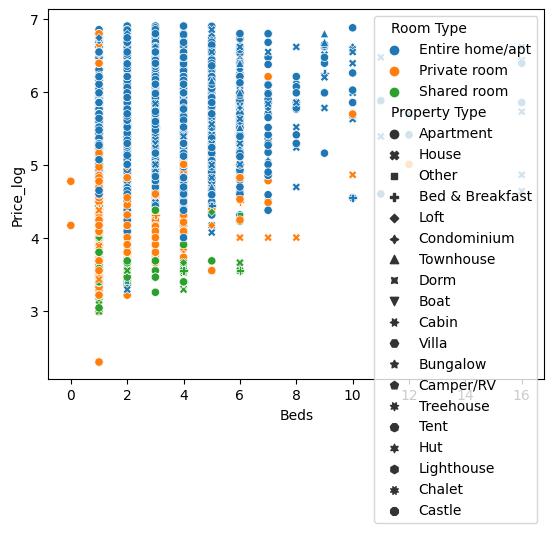

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

#NOTE: I was having trouble because all the plots are being plotted on the same one. i
#opted not to hashtag out plots in my submission, but I found that this was how I could see
#each plot individual while writing this code.

df = pd.read_csv('airbnb_cleanPrice')

print(df.dtypes)
print("-----------------------------------------------------------------------------------------------------")
print(df.columns)

#print("-----------------------------------------------------------------------------------------------------", '\n')
#print(df, '/n')
print(df.head(), '\n')
print("# rows: " , len(df), '\n')

#there are 30478 rows (observations) and 15 columns. There are both categorical and numerical variables

room_prop_crstb = pd.crosstab(df["Room Type"], df["Property Type"])
print(room_prop_crstb)
#what patterns in what kinds of rentals?For which kinds of properties are private rooms more common than renting the entire property
print("The kinds of properties where private rooms are more common than renting the entire property are: " '\n' "Bed & Breakfast; Castle; Chalet; Dorm; House; Hut; Other; Tent")


#histogram
df['Price'].hist(bins = 20, grid = False)

#Kernalplot
df["Price"].plot.density()

#Boxplot
df["Price"].plot.box()

#Statistical Description:
df["Price"].describe()

print("There are a lot of outliers, many of which are upwards of six times larger than the mean. In other words, there is a long tale.", '\n')

#transform Price and into a log

var = "Price_log"
df[var] = np.log(df['Price'])

#Loghisto
df[var].hist()

#logKarnal
df[var].plot.density()

#Boxplot
df[var].plot.box()

#Stat description:
df[var].describe()



#scatterplot of log_price and beds
#df.plot.scatter(y = var, x = "Beds")
#The scatter plot consists initially of very concentrated vertical lines", '\n', "the vertical lines are probably due to the discrete nature of beds", '\n', "The data becomes less concentrates after 6-8 bends. There seems to be a general trend upward.", '\n')

#df.loc[:, ["Beds",var]].groupby("Beds").describe()
#"The mean hovers around 5 to 5.5. Of note, the means are lowest where coutn is largest." , "\n", "The standard deviation seems to increase as sample sizes decrease.", '\n',  "It is possible, upon initial look, that there is a correlation between higher means and greater standard dev")

sns.scatterplot(data = df, y = var, x = "Beds", hue = "Room Type", style = "Property Type")
# This is really messy but it shows all the categorical variables in the set on one graph. The legend is just massive though.
#the prevalance in number of private rooms deceases as number of beds increases, which makes sense,
#considering that a single private rooms typically cannot contain as many beds as an entire home/appartment


prop_price = df.loc[:, ["Property Type", "Price"]].groupby("Property Type").describe()
print(prop_price, '\n')
print("----------------------------------------------------------------------------------------------")

room_price = df.loc[:, ["Room Type", "Price"]].groupby("Room Type").describe()
print(room_price, '\n')

max_mean_pp = prop_price['Price']['mean'].max()
print("Highest Property type price on average is the Condiminium: ", max_mean_pp, '\n')

max_mean_rp = room_price['Price']['mean'].max()
print("Highest Room Type price on average is the entire home/apt: ", max_mean_rp, '\n')

max_std_rp = room_price['Price']['std'].max()
print("Highest Room Type st dev is the entire home/apt: ", max_std_rp, '\n')

max_std_pp = prop_price['Price']['mean'].max()
print("Highest Property Type st dev is the other: ", max_std_pp, '\n')

#considering the long tail for the distribution of prices, to lessen the impact of outliers, I think that the median would be the best measurement of central tendency.

#remember that jointplots are a combination of a histogram and scatter plot to illustrate how the two variables covary

sns.jointplot(x = "Beds", y = "Price_log", data = df, kind = 'hex')
#the majority of the data is distributed where log(price) = 4 to 5; and where number of beds is between 1 and 2.
#I like this portrayal because it gives a better general, easy-to-understand picture of how the data is distributed.
#In the previous scatterplot, the vertical distribution lines were so concentrated
#that it was hard to discern if any were more concentrated than another. The impact of
#outliers are not weighty in this graph.


**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.